In [1]:
import tensorflow as tf
try: #If running in colab 
    import google.colab
    IN_COLAB = True 
except:
    IN_COLAB = False
if (not tf.__version__.startswith('2')): #Checking if tf 2.0 is installed
    if IN_COLAB: #If running in colab install tf 2.0
        !pip install tensorflow-gpu==2.0.0-alpha0
        !pip install tfp-nightly==0.7.0-dev20190511
    print('Please install tensorflow 2.0 to run this notebook')
print('Tensorflow version: ',tf.__version__, ' running in colab?: ', IN_COLAB)

Tensorflow version:  2.0.0-alpha0  running in colab?:  True


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm import tqdm_notebook as tqdm
from sklearn.model_selection import train_test_split
import tensorflow_probability as tfp


%matplotlib inline
plt.style.use('default')

tfd = tfp.distributions
tfb = tfp.bijectors
print("TFP Version", tfp.__version__)
print("TF  Version",tf.__version__)
np.random.seed(42)
tf.random.set_seed(42)


TFP Version 0.7.0-dev20190511
TF  Version 2.0.0-alpha0


In [0]:
from tensorflow.python.framework.ops import disable_eager_execution
disable_eager_execution()

In [4]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 9s 0us/step


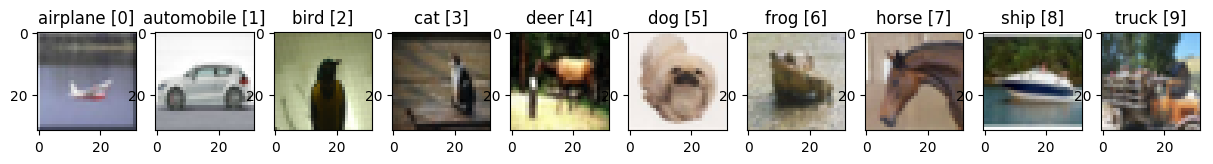

In [5]:
labels=np.array(["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"])
#sample image of each label
plt.figure(figsize=(15,15))
for i in range(0,len(np.unique(y_train))):
    rmd=np.random.choice(np.where(y_train==i)[0],1)
    plt.subplot(1,10,i+1)
    img=x_train[rmd]
    plt.imshow(img[0,:,:,:])
    plt.title(labels[i]+" "+np.str(y_train[rmd][0]))

In [0]:
#we delete all horses of the dataset
y_train_no_horse=np.delete(y_train,np.where(y_train==7)[0])
x_train_no_horse=np.delete(x_train,np.where(y_train==7)[0],axis=0)

In [7]:
print(y_train_no_horse.shape)
print(x_train_no_horse.shape)

(45000,)
(45000, 32, 32, 3)


In [0]:
y_train_no_horse=np.array(pd.get_dummies(y_train_no_horse))
labels_no_horse=np.array(["airplane","automobile","bird","cat","deer","dog","frog","ship","truck"])


In [9]:
print(y_train_no_horse.shape)

(45000, 9)


In [0]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train_no_horse, y_train_no_horse, test_size=0.4, random_state=22)


In [11]:
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)
print(x_test.shape)
print(y_test.shape)

(27000, 32, 32, 3)
(27000, 9)
(18000, 32, 32, 3)
(18000, 9)
(10000, 32, 32, 3)
(10000, 1)


In [0]:
## tf norm
x_train=((x_train/255)-0.5)*2
x_val=((x_val/255)-0.5)*2
x_test=((x_test/255)-0.5)*2

## Baseline "normal" CNN

In [13]:
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Dropout,Flatten,Dense
from tensorflow.keras import Sequential

model = Sequential()
model.add(Convolution2D(8,kernel_size=(3,3),padding="same", activation = 'relu',input_shape=(32,32,3)))
model.add(Convolution2D(8,kernel_size=(3,3),padding="same", activation = 'relu'))
model.add(MaxPooling2D((2,2)))
model.add(Convolution2D(16,kernel_size=(3,3),padding="same", activation = 'relu'))
model.add(Convolution2D(16,kernel_size=(3,3),padding="same", activation = 'relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(100, activation = 'relu'))
model.add(Dropout((0.5)))
model.add(Dense(100, activation = 'relu'))
model.add(Dropout((0.5)))
model.add(Dense(9, activation = 'softmax'))

model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 8)         224       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 8)         584       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 8)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 16)        1168      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 16)        2320      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0

In [14]:
history=model.fit(x_train, y_train,validation_data=(x_val,y_val), batch_size=128,epochs=50,verbose=1)
#nach  30 epochs overfitting

Train on 27000 samples, validate on 18000 samples
Epoch 1/50
27000/27000 [==============================] - 7s 247us/sample - loss: 1.9057 - accuracy: 0.2681 - val_loss: 1.5786 - val_accuracy: 0.4239
Epoch 2/50
27000/27000 [==============================] - 2s 81us/sample - loss: 1.6049 - accuracy: 0.3782 - val_loss: 1.4018 - val_accuracy: 0.4764
Epoch 3/50
27000/27000 [==============================] - 2s 81us/sample - loss: 1.4828 - accuracy: 0.4292 - val_loss: 1.3226 - val_accuracy: 0.5101
Epoch 4/50
27000/27000 [==============================] - 2s 81us/sample - loss: 1.4005 - accuracy: 0.4676 - val_loss: 1.2711 - val_accuracy: 0.5217
Epoch 5/50
27000/27000 [==============================] - 2s 81us/sample - loss: 1.3425 - accuracy: 0.4944 - val_loss: 1.2261 - val_accuracy: 0.5442
Epoch 6/50
27000/27000 [==============================] - 2s 80us/sample - loss: 1.2934 - accuracy: 0.5190 - val_loss: 1.1815 - val_accuracy: 0.5652
Epoch 7/50
27000/27000 [==============================]

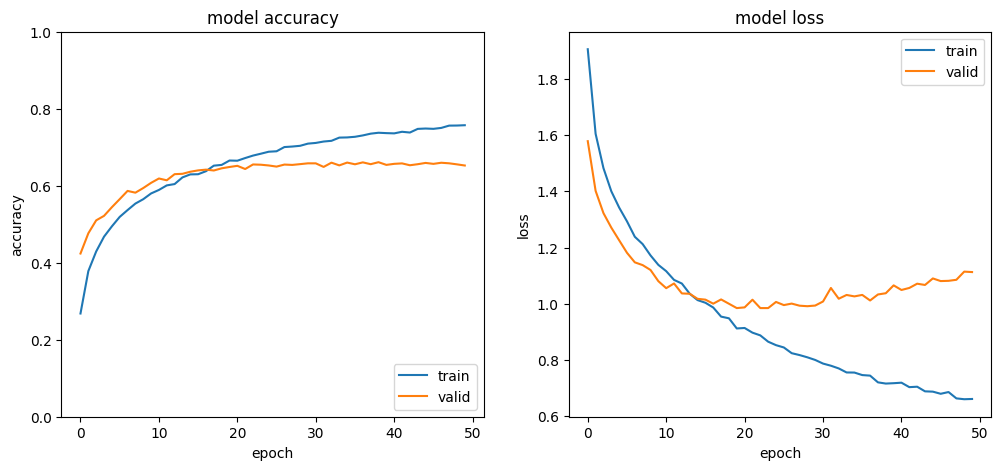

In [15]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylim(0, 1)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='lower right')
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper right')
plt.show()

## Variational Inference

In [16]:


kernel_divergence_fn=lambda q, p, _: tfp.distributions.kl_divergence(q, p) / (x_train.shape[0] * 1.0)
model_vi = Sequential()
model_vi.add(tfp.layers.Convolution2DFlipout(8,kernel_size=(3,3),padding="same", activation = 'relu', kernel_divergence_fn=kernel_divergence_fn,input_shape=(32,32,3)))
model_vi.add(tfp.layers.Convolution2DFlipout(8,kernel_size=(3,3),padding="same", activation = 'relu', kernel_divergence_fn=kernel_divergence_fn))
model_vi.add(tf.keras.layers.MaxPooling2D((2,2)))
model_vi.add(tfp.layers.Convolution2DFlipout(16,kernel_size=(3,3),padding="same", activation = 'relu', kernel_divergence_fn=kernel_divergence_fn))
model_vi.add(tfp.layers.Convolution2DFlipout(16,kernel_size=(3,3),padding="same", activation = 'relu', kernel_divergence_fn=kernel_divergence_fn))
model_vi.add(tf.keras.layers.MaxPooling2D((2,2)))
model_vi.add(tf.keras.layers.Flatten())
model_vi.add(tfp.layers.DenseFlipout(100, activation = 'relu', kernel_divergence_fn=kernel_divergence_fn))
model_vi.add(tfp.layers.DenseFlipout(100, activation = 'relu', kernel_divergence_fn=kernel_divergence_fn))
model_vi.add(tfp.layers.DenseFlipout(9, activation = 'softmax', kernel_divergence_fn=kernel_divergence_fn))

model_vi.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])
model_vi.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_flipout (Conv2DFlipou (None, 32, 32, 8)         440       
_________________________________________________________________
conv2d_flipout_1 (Conv2DFlip (None, 32, 32, 8)         1160      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 8)         0         
_________________________________________________________________
conv2d_flipout_2 (Conv2DFlip (None, 16, 16, 16)        2320      
_________________________________________________________________
conv2d_flipout_3 (Conv2DFlip (None, 16, 16, 16)        4624      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)             

In [17]:
for i in range(0,5):
  print(model_vi.predict(x_train[0:1])[0])
#we get a different pred at every run!

[0.15646946 0.0785192  0.07544266 0.1213315  0.14461632 0.05090769
 0.11963217 0.16585414 0.08722683]
[0.08263268 0.06581765 0.14520958 0.15312903 0.13437018 0.14791629
 0.11887134 0.06945533 0.08259787]
[0.1342817  0.08887739 0.1177219  0.09556011 0.12581713 0.1604335
 0.07674197 0.08092772 0.11963855]
[0.19053145 0.04705158 0.09463803 0.07782482 0.2287893  0.11341219
 0.13683933 0.05478482 0.05612848]
[0.09191442 0.11941835 0.10139237 0.09567946 0.1908383  0.07780876
 0.14390874 0.1239649  0.0550747 ]


In [18]:
history=model_vi.fit(x_train, y_train,validation_data=(x_val,y_val), batch_size=128,epochs=300,verbose=1)
# need a lot of epochs
# longer training would maybe give some improvement

Train on 27000 samples, validate on 18000 samples
Epoch 1/300
27000/27000 [==============================] - 4s 167us/sample - loss: 12.6371 - accuracy: 0.2451 - val_loss: 12.1272 - val_accuracy: 0.3189
Epoch 2/300
27000/27000 [==============================] - 4s 130us/sample - loss: 11.7121 - accuracy: 0.3634 - val_loss: 11.3340 - val_accuracy: 0.3972
Epoch 3/300
27000/27000 [==============================] - 3s 129us/sample - loss: 11.0000 - accuracy: 0.4107 - val_loss: 10.6828 - val_accuracy: 0.4269
Epoch 4/300
27000/27000 [==============================] - 3s 128us/sample - loss: 10.3876 - accuracy: 0.4420 - val_loss: 10.1057 - val_accuracy: 0.4471
Epoch 5/300
27000/27000 [==============================] - 3s 129us/sample - loss: 9.8305 - accuracy: 0.4623 - val_loss: 9.5789 - val_accuracy: 0.4605
Epoch 6/300
27000/27000 [==============================] - 4s 130us/sample - loss: 9.3216 - accuracy: 0.4784 - val_loss: 9.1151 - val_accuracy: 0.4749
Epoch 7/300
27000/27000 [===========

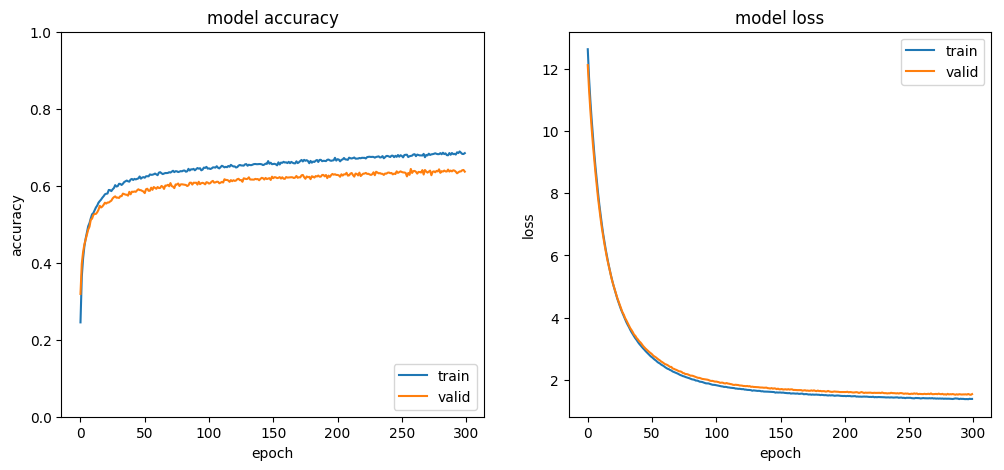

In [19]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylim(0, 1)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='lower right')
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper right')
plt.show()

## MC Dropout

In [20]:
#def MCDropout(rate):
#    return tf.keras.layers.Lambda(lambda x: tf.keras.backend.dropout(x, level=rate))

model_mc = Sequential()
model_mc.add(Convolution2D(8,kernel_size=(3,3),padding="same", activation = 'relu',input_shape=(32,32,3)))
model_mc.add(Dropout((0.3)))
model_mc.add(Convolution2D(8,kernel_size=(3,3),padding="same", activation = 'relu'))
model_mc.add(Dropout((0.3)))
model_mc.add(MaxPooling2D((2,2)))
model_mc.add(Convolution2D(16,kernel_size=(3,3),padding="same", activation = 'relu'))
model_mc.add(Dropout((0.3)))
model_mc.add(Convolution2D(16,kernel_size=(3,3),padding="same", activation = 'relu'))
model_mc.add(Dropout((0.3)))
model_mc.add(MaxPooling2D((2,2)))
model_mc.add(Flatten())
model_mc.add(Dense(100, activation = 'relu'))
model_mc.add(Dropout((0.3)))
model_mc.add(Dense(100, activation = 'relu'))
model_mc.add(Dropout((0.3)))
model_mc.add(Dense(9, activation = 'softmax'))

model_mc.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

model_mc.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 8)         224       
_________________________________________________________________
dropout_2 (Dropout)          (None, 32, 32, 8)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 32, 8)         584       
_________________________________________________________________
dropout_3 (Dropout)          (None, 32, 32, 8)         0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 8)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 16)        1168      
_________________________________________________________________
dropout_4 (Dropout)          (None, 16, 16, 16)       

In [21]:
for i in range(0,5):
  print(model_mc.predict(x_train[0:1])[0])
#we get a different pred at every run!

[0.12009998 0.10863481 0.1071433  0.10915193 0.1039006  0.10662505
 0.10992339 0.11623176 0.11828917]
[0.12009998 0.10863481 0.1071433  0.10915193 0.1039006  0.10662505
 0.10992339 0.11623176 0.11828917]
[0.12009998 0.10863481 0.1071433  0.10915193 0.1039006  0.10662505
 0.10992339 0.11623176 0.11828917]
[0.12009998 0.10863481 0.1071433  0.10915193 0.1039006  0.10662505
 0.10992339 0.11623176 0.11828917]
[0.12009998 0.10863481 0.1071433  0.10915193 0.1039006  0.10662505
 0.10992339 0.11623176 0.11828917]


In [0]:
import tensorflow.keras.backend as K
#f = K.function([model_mc.input], [model_mc.output])
model_mc_pred = K.function([model_mc.input, K.learning_phase()], [model_mc.output])



In [23]:
for i in range(0,5):
  print(model_mc_pred([x_train[0:1],0])[0])

[[0.12009998 0.10863481 0.1071433  0.10915193 0.1039006  0.10662505
  0.10992339 0.11623176 0.11828917]]
[[0.12009998 0.10863481 0.1071433  0.10915193 0.1039006  0.10662505
  0.10992339 0.11623176 0.11828917]]
[[0.12009998 0.10863481 0.1071433  0.10915193 0.1039006  0.10662505
  0.10992339 0.11623176 0.11828917]]
[[0.12009998 0.10863481 0.1071433  0.10915193 0.1039006  0.10662505
  0.10992339 0.11623176 0.11828917]]
[[0.12009998 0.10863481 0.1071433  0.10915193 0.1039006  0.10662505
  0.10992339 0.11623176 0.11828917]]


In [24]:
for i in range(0,5):
  print(model_mc_pred([x_train[0:1],1])[0])

[[0.14721246 0.0892667  0.1397768  0.09326523 0.07843588 0.08728761
  0.106191   0.11079338 0.14777093]]
[[0.12757131 0.08445012 0.14452061 0.10078784 0.06638861 0.10319148
  0.13806807 0.09207803 0.14294396]]
[[0.16392016 0.09858081 0.09582972 0.09634592 0.10535821 0.09593979
  0.10814016 0.10437176 0.13151358]]
[[0.1678929  0.09362854 0.09839205 0.09407763 0.09115537 0.07323924
  0.09515943 0.09005658 0.19639824]]
[[0.14398637 0.10589623 0.09340756 0.09258027 0.08174652 0.10597998
  0.14234827 0.11329274 0.12076208]]


In [25]:
history=model_mc.fit(x_train, y_train,validation_data=(x_val,y_val), batch_size=128,epochs=300,verbose=1)

Train on 27000 samples, validate on 18000 samples
Epoch 1/300
27000/27000 [==============================] - 3s 112us/sample - loss: 1.8691 - accuracy: 0.2801 - val_loss: 1.8171 - val_accuracy: 0.3277
Epoch 2/300
27000/27000 [==============================] - 2s 91us/sample - loss: 1.5947 - accuracy: 0.3870 - val_loss: 1.7164 - val_accuracy: 0.3478
Epoch 3/300
27000/27000 [==============================] - 2s 90us/sample - loss: 1.4947 - accuracy: 0.4309 - val_loss: 1.7210 - val_accuracy: 0.3758
Epoch 4/300
27000/27000 [==============================] - 2s 90us/sample - loss: 1.4295 - accuracy: 0.4617 - val_loss: 1.6451 - val_accuracy: 0.4015
Epoch 5/300
27000/27000 [==============================] - 2s 90us/sample - loss: 1.3749 - accuracy: 0.4823 - val_loss: 1.5857 - val_accuracy: 0.4206
Epoch 6/300
27000/27000 [==============================] - 2s 91us/sample - loss: 1.3400 - accuracy: 0.4997 - val_loss: 1.5220 - val_accuracy: 0.4651
Epoch 7/300
27000/27000 [========================

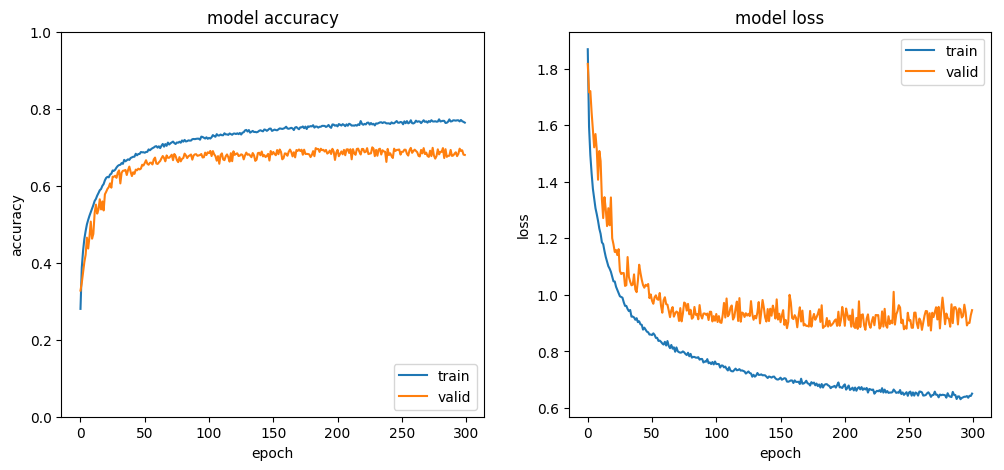

In [26]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylim(0, 1)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='lower right')
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper right')
plt.show()

### Acc on the lables in the train set for all three models
VI and MC 50 preds und then argmax of mean

In [27]:
known_idx=np.where(y_test!=7)[0]
print(len(known_idx))
x_test_known = x_test[known_idx]
y_test_known = y_test[known_idx]

unknown_idx=np.where(y_test==7)[0]
print(len(unknown_idx))
x_test_unknown = x_test[unknown_idx]
y_test_unknown = y_test[unknown_idx]

9000
1000


In [111]:
pred=np.argmax(model.predict(x_test_known),axis=1)
pred_label=np.array([labels_no_horse[np.int(pred[i])] for i in range(0,len(pred))])
true_label=np.array([labels[np.int(y_test_known[i])] for i in range(0,len(y_test_known))])
print("test_acc_on_known_lables =",np.sum(pred_label==true_label)/len(true_label) )
test_acc_known = np.sum(pred_label==true_label)/len(true_label)


test_acc_on_known_lables = 0.6516666666666666


In [0]:
from tqdm import tqdm_notebook as tqdm

In [113]:
# 50 pred and then mean and argmax for the val set
SET=x_test_known
pred=np.zeros((len(SET),1))
for i in tqdm(range(0,len(SET))):
  multi_img=np.tile(SET[i],(50,1,1,1))
  preds=model_vi.predict(multi_img)
  pred[i]=np.argmax(np.mean(preds,axis=0))#mean over n runs of every proba class

In [117]:
pred_label=np.array([labels_no_horse[np.int(pred[i])] for i in range(0,len(pred))])
true_label=np.array([labels[np.int(y_test_known[i])] for i in range(0,len(y_test_known))])
print("test_acc_on_known_lables =",np.sum(pred_label==true_label)/len(true_label) )
test_acc_known_vi = np.sum(pred_label==true_label)/len(true_label)


test_acc_on_known_lables = 0.6808888888888889


In [118]:
# 50 pred and then mean and argmax for the val set
SET=x_test_known
pred=np.zeros((len(SET),1))
for i in tqdm(range(0,len(SET))):
  multi_img=np.tile(SET[i],(50,1,1,1))
  preds=model_mc_pred([multi_img,1])
  pred[i]=np.argmax(np.mean(preds,axis=1))#mean over n runs of every proba class

In [122]:
pred_label=np.array([labels_no_horse[np.int(pred[i])] for i in range(0,len(pred))])
true_label=np.array([labels[np.int(y_test_known[i])] for i in range(0,len(y_test_known))])
print("test_acc_on_known_lables =",np.sum(pred_label==true_label)/len(true_label) )
test_acc_known_mc = np.sum(pred_label==true_label)/len(true_label)


test_acc_on_known_lables = 0.7313333333333333


In [123]:
import pandas as pd
pd.DataFrame(np.column_stack([test_acc_known,test_acc_known_vi,test_acc_known_mc]), index=['test acc on known labels'],columns=['baseline','VI','MC'])

,baseline,VI,MC
test acc on known labels,0.651667,0.680889,0.731333


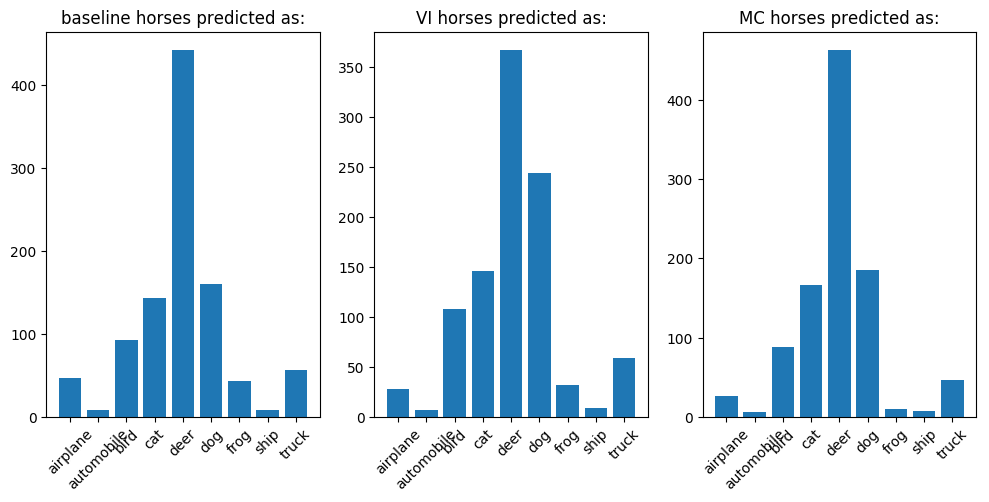

In [124]:
plt.figure(figsize=(12,5))
plt.subplot(1,3,1)
pred=np.argmax(model.predict(x_test_unknown),axis=1)
pred_label=np.array([labels_no_horse[np.int(pred[i])] for i in range(0,len(pred))])
plt.bar(np.unique(pred_label,return_counts=True)[0],np.unique(pred_label,return_counts=True)[1])
plt.xticks(rotation=45)
plt.title("baseline horses predicted as:")
plt.subplot(1,3,2)
SET=x_test_unknown
pred=np.zeros((len(SET),1))
for i in tqdm(range(0,len(SET))):
  multi_img=np.tile(SET[i],(50,1,1,1))
  preds=model_vi.predict(multi_img)
  pred[i]=np.argmax(np.mean(preds,axis=0))#mean over n runs of every proba class
pred_label=np.array([labels_no_horse[np.int(pred[i])] for i in range(0,len(pred))])
plt.bar(np.unique(pred_label,return_counts=True)[0],np.unique(pred_label,return_counts=True)[1])
plt.xticks(rotation=45)
plt.title("VI horses predicted as:")
plt.subplot(1,3,3)
SET=x_test_unknown
pred=np.zeros((len(SET),1))
for i in tqdm(range(0,len(SET))):
  multi_img=np.tile(SET[i],(50,1,1,1))
  preds=model_mc_pred([multi_img,1])
  pred[i]=np.argmax(np.mean(preds,axis=1))#mean over n runs of every proba class
pred_label=np.array([labels_no_horse[np.int(pred[i])] for i in range(0,len(pred))])
plt.bar(np.unique(pred_label,return_counts=True)[0],np.unique(pred_label,return_counts=True)[1])
plt.xticks(rotation=45)
plt.title("MC horses predicted as:")
plt.show()

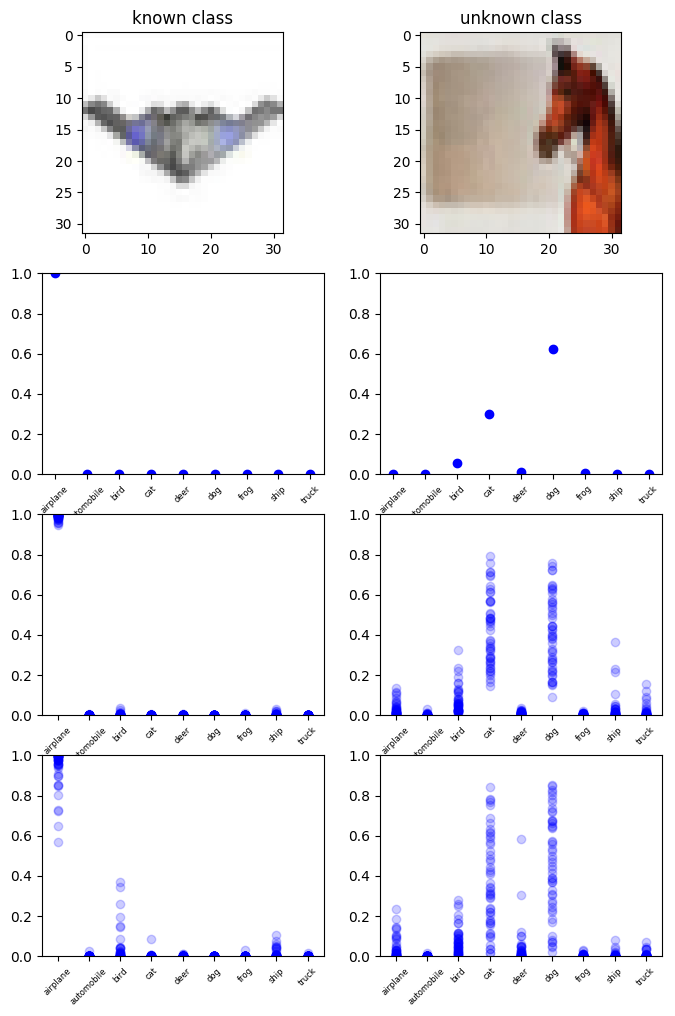

In [98]:
random_sample_known=np.random.choice(range(0,len(x_test_known)),1)
random_sample_unknown=np.random.choice(range(0,len(x_test_unknown)),1)
plt.figure(figsize=(8,12))
plt.subplot(4,2,1)
plt.imshow(np.squeeze(np.array(((((x_test_known[random_sample_known])/2)+0.5)*255),dtype="uint8")))
plt.title("known class")
plt.subplot(4,2,2)
plt.imshow(np.squeeze(np.array(((((x_test_unknown[random_sample_unknown])/2)+0.5)*255),dtype="uint8")))
plt.title("unknown class")

plt.subplot(4,2,3)
plt.scatter(range(0,9),model.predict(x_test_known[random_sample_known]),c="blue")
plt.xticks(range(0,9),labels=labels_no_horse,fontsize=6)
plt.xticks(rotation=45)

plt.ylim([0,1])
plt.subplot(4,2,4)
plt.scatter(range(0,9),model.predict(x_test_unknown[random_sample_unknown]),c="blue")
plt.ylim([0,1])
plt.xticks(range(0,9),labels=labels_no_horse,fontsize=6)
plt.xticks(rotation=45)
plt.subplot(4,2,5)
for i in range(0,50):
  plt.scatter(range(0,9),model_vi.predict(x_test_known[random_sample_known]),c="blue",alpha=0.2)
plt.xticks(range(0,9),labels=labels_no_horse,fontsize=6)
plt.xticks(rotation=45)
plt.ylim([0,1])
plt.subplot(4,2,6)
for i in range(0,50):
  plt.scatter(range(0,9),model_vi.predict(x_test_unknown[random_sample_unknown]),c="blue",alpha=0.2)
plt.xticks(range(0,9),labels=labels_no_horse,fontsize=6)
plt.xticks(rotation=45)
plt.ylim([0,1])
plt.subplot(4,2,7)
for i in range(0,50):
  plt.scatter(range(0,9),model_mc_pred([x_test_known[random_sample_known],1]),c="blue",alpha=0.2)
plt.xticks(range(0,9),labels=labels_no_horse,fontsize=6)
plt.xticks(rotation=45)
plt.ylim([0,1])
plt.subplot(4,2,8)
for i in range(0,50):
  plt.scatter(range(0,9),model_mc_pred([x_test_unknown[random_sample_unknown],1]),c="blue",alpha=0.2)
plt.xticks(range(0,9),labels=labels_no_horse,fontsize=6)
plt.xticks(rotation=45)
plt.ylim([0,1])
plt.show()

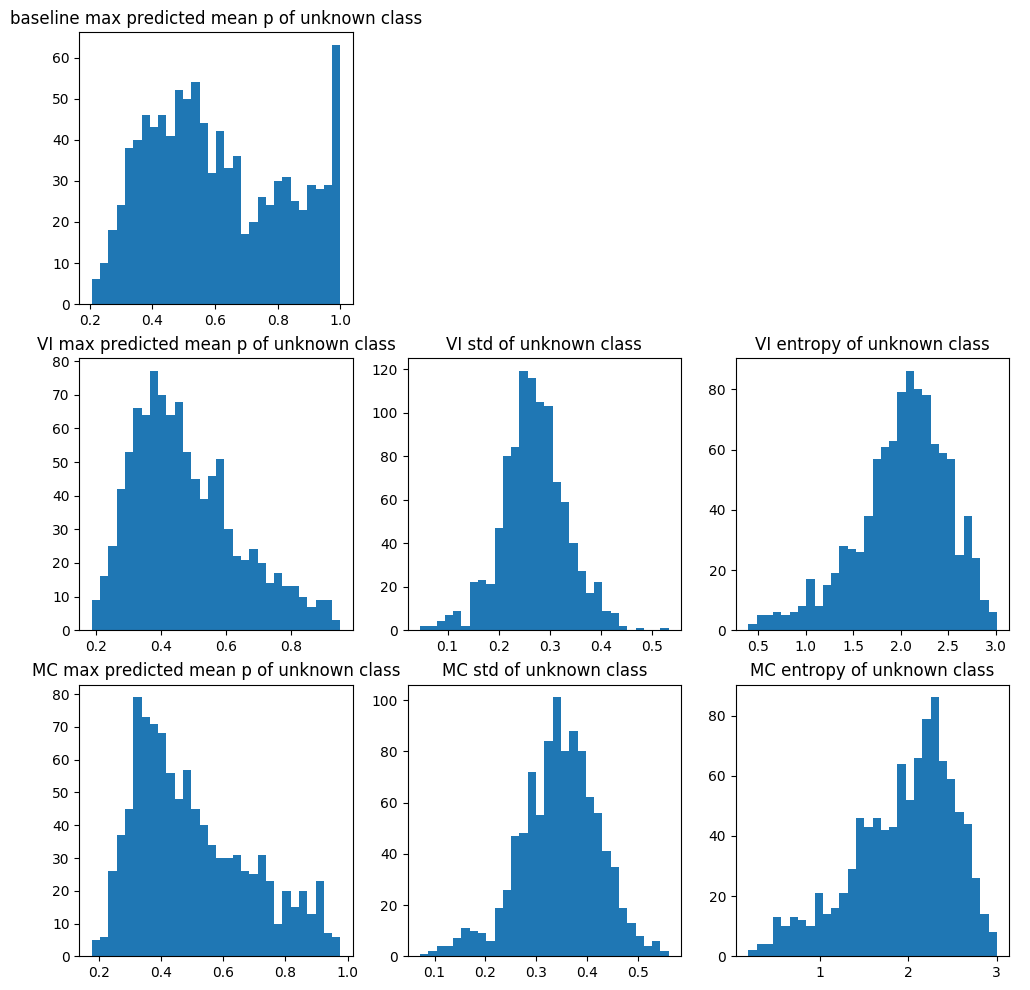

In [125]:

## look at the means sd and entropy of the true horses of the testset,
## here we want to see a hight uncertainty

pred=model.predict(x_test_unknown)
pred_uk=np.max(pred,axis=1)

plt.figure(figsize=(12,12))
plt.subplot(3,3,1)
plt.hist(pred_uk,bins=30)
plt.title("baseline max predicted mean p of unknown class")
plt.subplot(3,3,2)
plt.axis("off")
plt.subplot(3,3,3)
plt.axis("off")

SET=x_test_unknown
pred=np.zeros((len(SET),1))
pred_std_uk=np.zeros((len(SET),1))
pred_means_uk=np.zeros((len(SET),9))
entropy_uk = np.zeros((len(SET),1))

for i in tqdm(range(0,len(SET))):
  multi_img=np.tile(SET[i],(50,1,1,1))
  preds=model_vi.predict(multi_img)
  pred_means_uk[i]= np.mean(preds,axis=0)
  pred[i]=np.argmax(np.mean(preds,axis=0))
  pred_std_uk[i]= np.sqrt(np.sum(np.var(preds, axis=0)))
  entropy_uk[i] = -np.sum( pred_means_uk[i] * np.log2(pred_means_uk[i] + 1E-14)) #Numerical Stability

plt.subplot(3,3,4)
plt.hist(np.max(pred_means_uk,axis=1),bins=30)
plt.title("VI max predicted mean p of unknown class")
plt.subplot(3,3,5)
plt.hist(pred_std_uk,bins=30)
plt.title("VI std of unknown class")
plt.subplot(3,3,6)
plt.hist(entropy_uk,bins=30)
plt.title("VI entropy of unknown class")



SET=x_test_unknown
pred=np.zeros((len(SET),1))
pred_std_uk=np.zeros((len(SET),1))
pred_means_uk=np.zeros((len(SET),9))
entropy_uk = np.zeros((len(SET),1))

for i in tqdm(range(0,len(SET))):
  multi_img=np.tile(SET[i],(50,1,1,1))
  preds=model_mc_pred([multi_img,1])
  pred_means_uk[i]= np.mean(preds,axis=1)
  pred[i]=np.argmax(np.mean(preds,axis=1))
  pred_std_uk[i]= np.sqrt(np.sum(np.var(preds, axis=1)))
  entropy_uk[i] = -np.sum( pred_means_uk[i] * np.log2(pred_means_uk[i] + 1E-14)) #Numerical Stability

plt.subplot(3,3,7)
plt.hist(np.max(pred_means_uk,axis=1),bins=30)
plt.title("MC max predicted mean p of unknown class")
plt.subplot(3,3,8)
plt.hist(pred_std_uk,bins=30)
plt.title("MC std of unknown class")
plt.subplot(3,3,9)
plt.hist(entropy_uk,bins=30)
plt.title("MC entropy of unknown class")
plt.show()


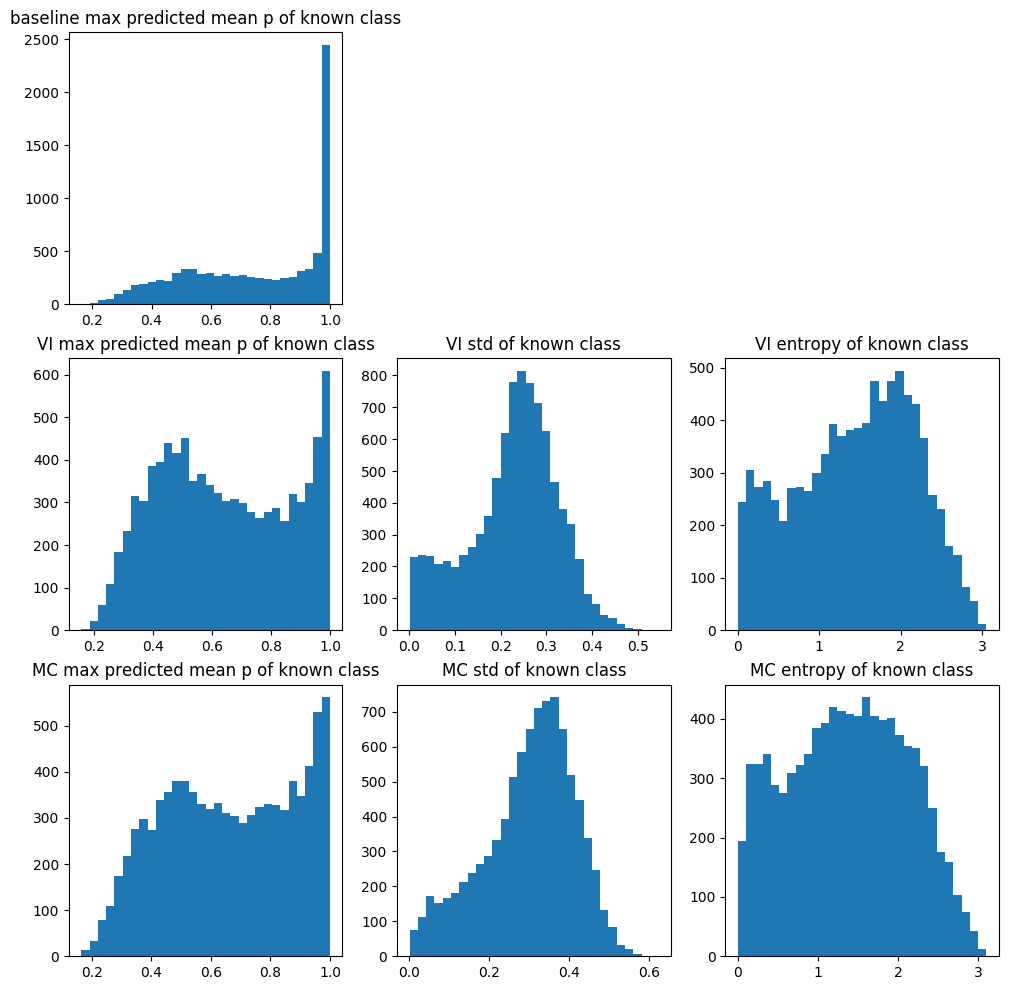

In [126]:
## look at the means sd and entropy of the known classes of the testset,
## here we want to see a low uncertainty

pred=model.predict(x_test_known)
pred_uk=np.max(pred,axis=1)

plt.figure(figsize=(12,12))
plt.subplot(3,3,1)
plt.hist(pred_uk,bins=30)
plt.title("baseline max predicted mean p of known class")
plt.subplot(3,3,2)
plt.axis("off")
plt.subplot(3,3,3)
plt.axis("off")

SET=x_test_known
pred=np.zeros((len(SET),1))
pred_std_uk=np.zeros((len(SET),1))
pred_means_uk=np.zeros((len(SET),9))
entropy_uk = np.zeros((len(SET),1))

for i in tqdm(range(0,len(SET))):
  multi_img=np.tile(SET[i],(50,1,1,1))
  preds=model_vi.predict(multi_img)
  pred_means_uk[i]= np.mean(preds,axis=0)
  pred[i]=np.argmax(np.mean(preds,axis=0))
  pred_std_uk[i]= np.sqrt(np.sum(np.var(preds, axis=0)))
  entropy_uk[i] = -np.sum( pred_means_uk[i] * np.log2(pred_means_uk[i] + 1E-14)) #Numerical Stability

plt.subplot(3,3,4)
plt.hist(np.max(pred_means_uk,axis=1),bins=30)
plt.title("VI max predicted mean p of known class")
plt.subplot(3,3,5)
plt.hist(pred_std_uk,bins=30)
plt.title("VI std of known class")
plt.subplot(3,3,6)
plt.hist(entropy_uk,bins=30)
plt.title("VI entropy of known class")



SET=x_test_known
pred=np.zeros((len(SET),1))
pred_std_uk=np.zeros((len(SET),1))
pred_means_uk=np.zeros((len(SET),9))
entropy_uk = np.zeros((len(SET),1))

for i in tqdm(range(0,len(SET))):
  multi_img=np.tile(SET[i],(50,1,1,1))
  preds=model_mc_pred([multi_img,1])
  pred_means_uk[i]= np.mean(preds,axis=1)
  pred[i]=np.argmax(np.mean(preds,axis=1))
  pred_std_uk[i]= np.sqrt(np.sum(np.var(preds, axis=1)))
  entropy_uk[i] = -np.sum( pred_means_uk[i] * np.log2(pred_means_uk[i] + 1E-14)) #Numerical Stability

plt.subplot(3,3,7)
plt.hist(np.max(pred_means_uk,axis=1),bins=30)
plt.title("MC max predicted mean p of known class")
plt.subplot(3,3,8)
plt.hist(pred_std_uk,bins=30)
plt.title("MC std of known class")
plt.subplot(3,3,9)
plt.hist(entropy_uk,bins=30)
plt.title("MC entropy of known class")
plt.show()


## Filter our preds with pmax and p_mean

In [127]:
pred=model.predict(x_test)
pred=np.max(pred,axis=1)
certainty_idx = np.argsort(pred.reshape(len(pred)))
certainty_idx = certainty_idx[::-1]#reverse
print(certainty_idx[0:10])
print(pred[certainty_idx[0:10]])

[4787 5323 8228 3515 8247 5457 6611 4083 7459 7891]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in long_scalars
  



[2445 8445 4314 6159  612 6638  604 7992 3691 4912]
[0.99982309 0.99980795 0.99968958 0.99961329 0.99961263 0.99958229
 0.99956024 0.99954271 0.99953985 0.99950272]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in long_scalars



[5989 2399 8195  612 7715 9412 2476 2135 8379 5054]
[0.9999392  0.99973595 0.99971843 0.99950814 0.99950457 0.99947822
 0.99927092 0.99914068 0.99906737 0.99900591]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:70: RuntimeWarning: invalid value encountered in long_scalars


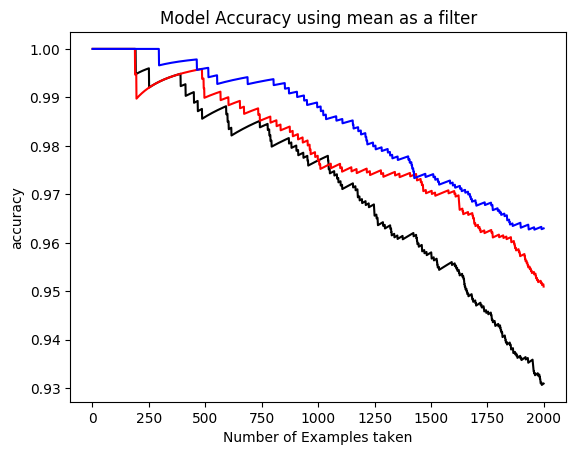

In [129]:
pred=model.predict(x_test)
pred=np.max(pred,axis=1)
certainty_idx = np.argsort(pred.reshape(len(pred)))
certainty_idx = certainty_idx[::-1]#reverse


pred=model.predict(x_test)
acc_nbest = np.zeros((2000))
for j in tqdm(range(0,2000)):
  pred_am=np.argmax(pred[certainty_idx[0:j]],axis=1)
  pred_label=np.array([labels_no_horse[np.int(pred_am[i])] for i in range(0,len(pred_am))])
  tmp=y_test[certainty_idx[0:j]]
  true_label=np.array([labels[np.int(tmp[i])] for i in range(0,len(tmp))])
  acc_nbest[j]=(np.sum(pred_label==true_label)/len(pred_label))

plt.plot(acc_nbest,c="black")
plt.title('Model Accuracy using mean as a filter')
plt.ylabel('accuracy')
plt.xlabel('Number of Examples taken')


SET=x_test
pred=np.zeros((len(SET),1))
pred_means_uk=np.zeros((len(SET),9))

for i in tqdm(range(0,len(SET))):
  multi_img=np.tile(SET[i],(50,1,1,1))
  preds=model_vi.predict(multi_img)
  pred_means_uk[i]= np.mean(preds,axis=0)

pred=np.max(pred_means_uk,axis=1)
certainty_idx = np.argsort(pred.reshape(len(pred)))
certainty_idx = certainty_idx[::-1]#reverse
print(certainty_idx[0:10])
print(pred[certainty_idx[0:10]])

acc_nbest = np.zeros((2000))
for j in tqdm(range(0,2000)):
  pred_am=np.argmax(pred_means_uk[certainty_idx[0:j]],axis=1)
  pred_label=np.array([labels_no_horse[np.int(pred_am[i])] for i in range(0,len(pred_am))])
  tmp=y_test[certainty_idx[0:j]]
  true_label=np.array([labels[np.int(tmp[i])] for i in range(0,len(tmp))])
  acc_nbest[j]=(np.sum(pred_label==true_label)/len(pred_label))
  
plt.plot(acc_nbest,c="red")



SET=x_test
pred=np.zeros((len(SET),1))
pred_means_uk=np.zeros((len(SET),9))

for i in tqdm(range(0,len(SET))):
  multi_img=np.tile(SET[i],(50,1,1,1))
  preds=model_mc_pred([multi_img,1])
  pred_means_uk[i]= np.mean(preds,axis=1)

pred=np.max(pred_means_uk,axis=1)
certainty_idx = np.argsort(pred.reshape(len(pred)))
certainty_idx = certainty_idx[::-1]#reverse
print(certainty_idx[0:10])
print(pred[certainty_idx[0:10]])

acc_nbest = np.zeros((2000))
for j in tqdm(range(0,2000)):
  pred_am=np.argmax(pred_means_uk[certainty_idx[0:j]],axis=1)
  pred_label=np.array([labels_no_horse[np.int(pred_am[i])] for i in range(0,len(pred_am))])
  tmp=y_test[certainty_idx[0:j]]
  true_label=np.array([labels[np.int(tmp[i])] for i in range(0,len(tmp))])
  acc_nbest[j]=(np.sum(pred_label==true_label)/len(pred_label))
  
plt.plot(acc_nbest,c="blue")
